<a href="https://colab.research.google.com/github/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/ejercicios/2_Clasificacion_binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style="color:rgb(50,120,229)"> Clasificación Binaria en Keras </font>

En este cuaderno, introduciremos el tema de la **clasificación binaria**.

En el aprendizaje automático, la clasificación se refiere al problema de modelado predictivo de identificar a cuál de un conjunto de categorías pertenece una observación. Las categorías se denominan clases.

En la figura siguiente, mostramos un conjunto de datos hipotético que representa dos clases. Hemos codificado por colores las clases como rojo y azul, pero esto es solo para fines de visualización. Las clases en sí mismas están caracterizadas por dos características ($x1$ y $x2$).

Nuestra tarea es definir un modelo que prediga la clase correcta en función del valor de dos características de entrada.


<center>
<img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/ejercicios/images/binary_casslification.jpg?raw=1" width="800px">
</center>

In [24]:
import os
import random
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt  # one of the best graphics library for python
import requests


plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.style.use('ggplot')

block_plot = False

In [25]:
INPUT_SHAPE = (2, )
EPOCHS = 100

In [26]:
DATA_PATH = './data/binary_classification_data.npy'

## <font style="color:rgb(50,120,229)">1. Carga de datos </font>

En este ejemplo cargaremos un conjunto de datos de clasificación binaria. Este conjunto de datos tiene dos características (x1 y x2) y una etiqueta de clase (0 o 1).

In [27]:
data = np.load(DATA_PATH)

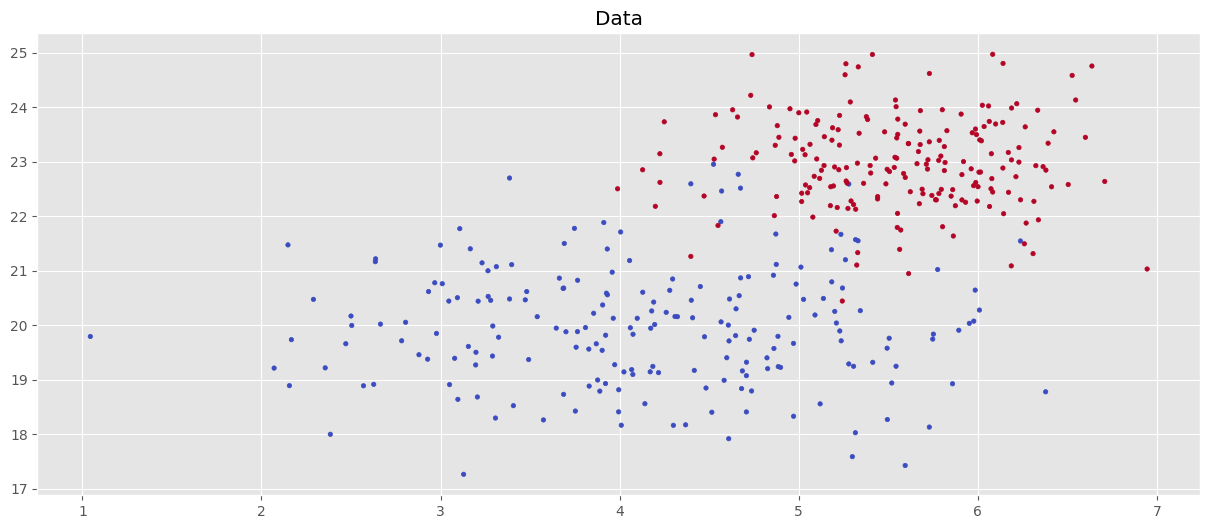

In [28]:
#Visualize the data
plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap='coolwarm', s=10)
plt.title('Data')
plt.show()

## <font style="color:rgb(50,120,229)">2. Preparación de datos </font>

Los datos que generamos tienen tres columnas: x1, x2 y y. Las dos primeras columnas son las características y la última columna es la etiqueta de clase.

Dividiremos los datos en:

- X_train: características de entrenamiento
- y_train: etiquetas de entrenamiento

In [31]:
X_train = data[:,0:2]
y_train = data[:,2]

#Mezclar los datos
idx = np.arange(X_train.shape[0])
np.random.shuffle(idx)

X_train = X_train[idx]
y_train = y_train[idx]


print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Etiquetas de entrenamiento: {y_train.shape}")


Datos de entrenamiento: (400, 2)
Etiquetas de entrenamiento: (400,)


## <font style="color:rgb(50,120,229)">3. Normalización de datos </font>

Antes de comenzar con nuestro entrenamiento real, necesitamos normalizar nuestros datos utilizando su media y desviación estándar.

**La normalización ayuda a que el modelo converja más rápido.**

La normalización que aplicaremos es la **estandarización**:

$$x_{\text{estandarizado}} = \frac{x - \mu}{\sigma}$$

donde $\mu$ es la media y $\sigma$ es la desviación estándar.

<font style="color:rgb(8,133,37)">**Sintaxis:**</font>

```python
from keras.layers import Normalization

normalizer = Normalization(axis=-1)

# adaptamos el normalizador a los datos
normalizer.adapt(data)
```

**Parámetros:**

- `data:` Array de NumPy
- `axis:` Eje a lo largo del cual se calcula la media y la desviación estándar (1 para columnas y -1 para filas)

In [17]:
from keras.layers import Normalization

normalizer = Normalization(axis=-1)

# adaptamos el normalizador a los datos
normalizer.adapt(data)

In [30]:
#TODO: Obtener la media y la desviación estándar de los datos de entrenamiento

#TODO: Crear una capa de normalización y adaptarla a los datos de entrenamiento


print(f"Media: {normalizer.mean.numpy()}")
print(f"Desviación estándar: {normalizer.variance.numpy()}")

Media: [[ 4.8591685 21.474037   0.5      ]]
Desviación estándar: [[1.1195816 3.2062044 0.25     ]]


## <font style="color:rgb(50,120,229)">4. Arquitectura modelo </font>

La arquitectura del modelo para clasificación binaria que se muestra a continuación es similar a la regresión, pero resaltemos las diferencias.

- En primer lugar, observe que usamos una función de activación sigmoide ya que la salida predicha es una etiqueta en lugar de un número de valor real.
  
- La etiqueta indica qué clase se predice. En este ejemplo, suponemos clasificación binaria, por lo que tenemos dos etiquetas (digamos, 0 y 1).
  
- Tenga en cuenta que la clasificación binaria puede usar cualquier cantidad de características de entrada. En este cuaderno, usaremos dos características de entrada, pero esto no tiene nada que ver con el hecho de que estemos realizando clasificación binaria.

<center>
<img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/ejercicios/images/binary_architecture.webp?raw=1" width="800px">
</center>


In [20]:
#TODO: Crea un modelo secuencial con una capa de entrada de 2 neuronas
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()

model.add(Input(shape=INPUT_SHAPE))
model.add(normalizer)
model.add(Dense(1, activation='sigmoid'))
model.summary()

#TODO: Añade la capa de normalización definida anteriormente

#TODO: Añade una capa densa con 1 neurona y función de activación sigmoide (sigmoid)

#TODO: Muestra un resumen del modelo

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 2)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (44.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 7 (32.00 B)

Recuerda que el flujo de entrenamiento es el siguiente:

<center>
<img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/ejercicios/images/keras_training_workflow.webp?raw=1" width="600px">
</center>

## <font style="color:rgb(50,120,229)">5. Compilar el modelo </font>

Recuerda que compilar el modelo se refiere a especificar una función de pérdida y un optimizador.

- Usaremos la función de pérdida de entropía cruzada binaria.
- Usaremos el optimizador SGD.

In [22]:
#TODO Compila el modelo con optimizador SGD y función de pérdida binary_crossentropy
model.compile(optimizer='sgd', loss='binary_crossentropy')

## <font style="color:rgb(50,120,229)">7. Entrenamiento del modelo </font>

Recuerda que el entrenamiento del modelo implica llamar al método `fit` en el modelo.

In [23]:
#TODO: Entrena el modelo con los datos de entrenamiento y 100 épocas, guarda el historial en la variable history
model.fit(X_train, y_train, epochs=EPOCHS)

Epoch 1/100


ValueError: Exception encountered when calling Normalization.call().

[1mDimensions must be equal, but are 2 and 3 for '{{node sequential_1_1/normalization_1/Sub}} = Sub[T=DT_FLOAT](data, sequential_1_1/normalization_1/Sub/y)' with input shapes: [?,2], [1,3].[0m

Arguments received by Normalization.call():
  • inputs=tf.Tensor(shape=(None, 2), dtype=float32)

In [ ]:
loss = history.history['loss']
plt.figure(figsize=(20, 6))
plt.plot(range(len(loss)), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.grid(True)

plt.show(block=block_plot)
plt.close()

## <font style="color:rgb(50,120,229)">9. Visualización de la frontera de decisión </font>

Vamos a generar nuevos datos y ver como el modelo clasifica estos datos. **Esto solo es con fines de visualización, no es parte del proceso de entrenamiento habitual.**

In [ ]:
weights = model.layers[1].get_weights()[0]
w1 = weights[0][0]
w2 = weights[1][0]
b  = model.layers[1].get_weights()[1]

print('Weights associated with normalized data')
print('b: ',b)
print('w1: ',w1)
print('w2: ',w2)
print('\n')

# Retrieve normalization statistics.
norm_mean = normalizer.mean.numpy()[0]
norm_var = normalizer.variance.numpy()[0]

std_1 = math.sqrt(norm_var[0])
std_2 = math.sqrt(norm_var[1])

mean_1 = norm_mean[0]
mean_2 = norm_mean[1]

# Unnormalize the weights for use in diagnostics.
w1 = w1/std_1
w2 = w2/std_2
b = b - w1*mean_1 - w2*mean_2

print('Weights associated with unnormalized data')
print('b: ',b)
print('w1: ',w1)
print('w2: ',w2)

In [ ]:
class_0_points = data[data[:, 2] == 0][:, 0:2]
class_1_points = data[data[:, 2] == 1][:, 0:2]

In [ ]:


plt.figure(figsize=(20, 8))
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], color="b", alpha=0.5, label="Class:0")
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], color="r", alpha=0.5, label="Class:1")

x1 = tf.linspace(0.0, 10.0, 1000)
x2 = -(w1/w2)*x1 - b/w2

plt.plot(x1, x2, c="black", alpha=.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim([0, 10])
plt.ylim([16, 28])
plt.grid(True)
plt.legend()
plt.show(block=block_plot)

## <font style="color:rgb(50,120,229)"> Preguntas de comprensión </font>

Responder las siguientes preguntas:

1. ¿Qué es la clasificación binaria?
2. ¿Por queé fue importante mezclar los datos antes de entrenar el modelo?
3. ¿Que función de activación se utiliza en la capa de salida de un modelo de clasificación binaria?
4. ¿Qué función de pérdida se utiliza en un modelo de clasificación binaria?
5. ¿Qué ventaja tiene la normalización de datos en el entrenamiento de un modelo?